# Автоматический курс валют в шаблоне ТАСС

## Загружаем необходимые бибилиотеки
Кажется, что их избыточно много, но без них все работает абы  как.

In [1]:
from pandas_datareader import data as pdr # для понимания дат
import datetime # для манипуляций с датами
from datetime import timedelta # для вычесления вчерашнего дня
import pandas as pd # для работы с данными
import yfinance as yf # для подключения к Yahoo Finance
import numpy as np # для вычислений
import matplotlib.pyplot as plt #для визуализации

## Работа с датами
Нам нужно определить сегодняшний и вчерашний день

In [2]:
start = '2014-01-01' # с этой дты начнется построение графика

In [3]:
# дату сегодняшнего дня я буду использовать в вычислениях

today = datetime.date.today()
print(today)

2020-03-21


In [4]:
day_before = datetime.date.today() - timedelta(days=1) #определяю вчерашний день
print(day_before)

2020-03-20


In [5]:
# определил текущее время до минуты 
# потом я буду это использовать в оформлении

now = datetime.datetime.now().strftime('%d.%m.%Y %H:%M') # strtime позволяет оформить время в любой формат
print(now)

21.03.2020 22:42


## Сбор данных
Используем доступ к Yahoo Finance

In [6]:
yf.pdr_override() # магия

In [7]:
# делаем запрос ежедневной статистики
# стоимости доллара и евро в рублях

finance = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=start, end=today, interval='1d')
finance.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2013-12-31  45.134499  32.683201  45.134499  32.683201  45.402599  32.946602   
2014-01-01  45.213001  32.683201  45.213001  32.683201  45.213001  32.946602   
2014-01-02  45.213001  32.706001  45.213001  32.706001  45.299702  33.133999   
2014-01-03  45.194099  33.095200  45.194099  33.095200  45.245399  33.177700   
2014-01-06  45.109299  33.165001  45.109299  33.165001  45.342999  33.282902   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2013-12-31  45.002399  32.716202  45.177799  32.716202      0.0      0.0  
2014-01-01  45.213001  32.661999  45.213001  32.716202      0.0      0.0  
2014-01-02  44.986500  32.753201  45.213001  32.755199      0.0      0.0  
2014-01-03  44.870701  33.007702  45.206001  33.098701      0.0      0.0  
2014-01-06  44.200001  33.140202  44.200001  33.162498      0.0      0.0

In [8]:
# делаем запрос статистики с шагом в час
# с начала вчерашнего дня по текущий момент

fresh = pdr.get_data_yahoo(["USDRUB=X","EURRUB=X"], start=day_before, end=today, interval='1h')
fresh.head()

[*********************100%***********************]  2 of 2 completed


Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2020-03-19  84.057999  78.820000  84.057999  78.820000  84.611000  79.327301   
2020-03-19  84.164001  79.738403  84.164001  79.738403  84.958199  79.751503   
2020-03-19  84.141998  78.903000  84.141998  78.903000  84.989998  79.744003   
2020-03-20  84.570999  79.931999  84.570999  79.931999  84.598999  79.931999   
2020-03-20  84.890999  79.097000  84.890999  79.097000  85.427002  79.920998   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2020-03-19  83.999001  78.793999  84.536003  79.056999        0        0  
2020-03-19  84.002998  78.787003  84.002998  78.796997        0        0  
2020-03-19  84.123001  78.901001  84.930397  79.744003        0        0  
2020-03-20  84.086998  78.887001  84.086998  78.903999        0        0  
2020-03-20  84.584999  78.897003  85.244003  79.294998        0        0

In [9]:
# забираю из статистики с шагом в час
# самое последнее значение

fresh = fresh.iloc[[-1]]
fresh.head()

Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2020-03-20  85.310997  79.914803  85.310997  79.914803  85.509003  80.042999   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2020-03-20  84.917702  79.751999  85.264603  79.992851        0        0

## Манипуляции с данными
Данные нужно объединить

In [10]:
# объединяю таблицу ежедневной статистики
# с самым свежим сегодняшним значением

data = [finance, fresh]
data = pd.concat(data)
data

Adj Close                 Close                  High             \
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X   
Date                                                                           
2013-12-31  45.134499  32.683201  45.134499  32.683201  45.402599  32.946602   
2014-01-01  45.213001  32.683201  45.213001  32.683201  45.213001  32.946602   
2014-01-02  45.213001  32.706001  45.213001  32.706001  45.299702  33.133999   
2014-01-03  45.194099  33.095200  45.194099  33.095200  45.245399  33.177700   
2014-01-06  45.109299  33.165001  45.109299  33.165001  45.342999  33.282902   
...               ...        ...        ...        ...        ...        ...   
2020-03-17  83.270103  74.356300  83.270103  74.356300  83.479103  75.205002   
2020-03-18  82.762901  75.297501  82.762901  75.297501  87.605003  80.231003   
2020-03-19  88.683197  80.919998  88.683197  80.919998  89.618401  82.073799   
2020-03-20  84.454399  78.965599  84.454399  78.965599  85.559998  79.776497   
2020-03-20  85.310997  79.914803  85.310997  79.914803  85.509003  80.042999   

                  Low                  Open              Volume           
             EURRUB=X   USDRUB=X   EURRUB=X   USDRUB=X EURRUB=X USDRUB=X  
Date                                                                      
2013-12-31  45.002399  32.716202  45.177799  32.716202      0.0      0.0  
2014-01-01  45.213001  32.661999  45.213001  32.716202      0.0      0.0  
2014-01-02  44.986500  32.753201  45.213001  32.755199      0.0      0.0  
2014-01-03  44.870701  33.007702  45.206001  33.098701      0.0      0.0  
2014-01-06  44.200001  33.140202  44.200001  33.162498      0.0      0.0  
...               ...        ...        ...        ...      ...      ...  
2020-03-17  81.825996  73.446999  83.288803  74.356300      0.0      0.0  
2020-03-18  82.547699  75.102097  82.774200  75.147903      0.0      0.0  
2020-03-19  85.265999  79.242996  88.557999  80.921303      0.0      0.0  
2020-03-20  83.293999  77.422997  84.452301  78.965599      0.0      0.0  
2020-03-20  84.917702  79.751999  85.264603  79.992851      0.0      0.0  

[1623 rows x 12 columns]

In [11]:
# мне не нужны все столбцы
# беру только "Закрытие"

data = data[['Close']]
data

Close           
             EURRUB=X   USDRUB=X
Date                            
2013-12-31  45.134499  32.683201
2014-01-01  45.213001  32.683201
2014-01-02  45.213001  32.706001
2014-01-03  45.194099  33.095200
2014-01-06  45.109299  33.165001
...               ...        ...
2020-03-17  83.270103  74.356300
2020-03-18  82.762901  75.297501
2020-03-19  88.683197  80.919998
2020-03-20  84.454399  78.965599
2020-03-20  85.310997  79.914803

[1623 rows x 2 columns]

## Предварительный просмотр
Смотрю все ли в порядке с данными

C:\Users\novic\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


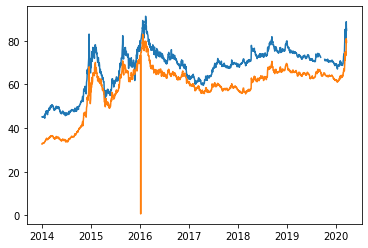

In [12]:
plt.plot(data)
plt.show()

Вижу резкий выброс очевидно ошибочных значений

## Удаление ошибочных значений
Мне нужно найти в какую дату были ошибки и удалить соответствующие строки

In [13]:
 # забираю в отдельную таблицу значения доллара

usd = data.loc[:,(slice(None),'USDRUB=X')]
usd

,Close
,USDRUB=X
Date,
2013-12-31,32.683201
2014-01-01,32.683201
2014-01-02,32.706001
2014-01-03,33.095200
2014-01-06,33.165001
...,...
2020-03-17,74.356300
2020-03-18,75.297501


In [14]:
usdmindate = usd.idxmin() # ищу дату минимального значения доллара
print(usdmindate)

Close  USDRUB=X   2016-01-06
dtype: datetime64[ns]


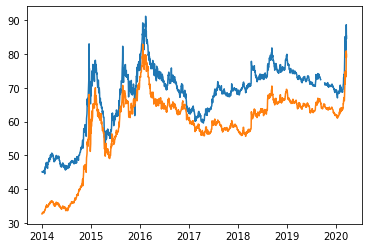

In [15]:
data = data.drop(usdmindate) # удаляю строку с этой датой из таблицы

plt.plot(data) # и проверяю графически
plt.show()

Ошибки нет. Миссия выполнена!

## Переменные для графика

In [16]:
# после фильтрации ошибочных данных мне снова нужна статистика только доллара и только евро

usd = data.loc[:,(slice(None),'USDRUB=X')]
euro = data.loc[:,(slice(None),'EURRUB=X')]

In [17]:
# евро и доллар будут меняться по оси Y
# по оси X у нас будет время в формате datetime

time = data.index

In [18]:
# ищу данные для маркеров и подписей свежих значений

fresh = fresh[['Close']] # свежие значения закрытия 
freshtime = fresh.index # индекс и время последнего значения
print(freshtime[0])

2020-03-20 00:00:00


In [19]:
freshdollar = fresh.loc[:,(slice(None),'USDRUB=X')].values # последнее значение доллара
print(freshdollar[0][0])

79.91480255126953


In [20]:
fresheuro = fresh.loc[:,(slice(None),'EURRUB=X')].values # последнее значение евро
print(fresheuro[0][0])

85.31099700927734


In [21]:
# преобразую значение доллара и евро в нужный формат для вывода на экран

dollarprint = '{:.2f}'.format(freshdollar[0][0])
europrint = '{:.2f}'.format(fresheuro[0][0])

print('Доллар в нужном формате: ' + dollarprint)
print('Евро в нужном формате: ' + europrint)
print('Последнее обновление: ' + now) # на всякий случай вспоминаю про то что есть данные последнего обновления

Доллар в нужном формате: 79.91
Евро в нужном формате: 85.31
Последнее обновление: 21.03.2020 22:42


## Оформление графика
Теперь самое интересное. Такой график можно использовать, но одсознательно аудитория будет больше доверять единообразно оформленным визуальным коммуникациям. Диаграммы должны быть последовательно аккуратны и максимально понятны. Для этого, в качестве добавочной стоимости, используют различные приёмы графического дизайна

In [22]:
plt.rcParams['font.sans-serif'] = 'GOST UI 2' # меняю шрифт по-умолчанию

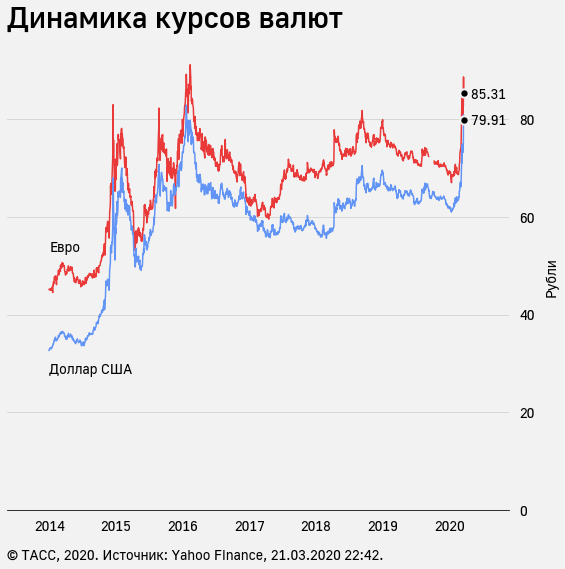

In [23]:
# создадим переменную fig и зададим ей размеры

fig = plt.figure(
    figsize=(9, 8.6),
    facecolor='#F2F2F2'
)

# поместим эт фигуру в переменную ax
# ax будет единственным графиком в модульной сетке
# за такую настройку отвечает add_subplot()

ax = fig.add_subplot()

# строим кривые изменения евро и доллара

ax.plot(time, euro, color='#EA3939')
ax.plot(time, usd, color='#6294F5')

# строим и задаем параметы точек последних значений

ax.scatter(freshtime, fresheuro, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)
ax.scatter(freshtime, freshdollar, color = 'black', zorder=2.5, edgecolors='#F2F2F2', s=70, linewidths=2)

# у границ модуля есть настройки видимости
# я отключаю их кроме нижней линии оси Х

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)

ax.yaxis.tick_right() # перемещаю макреры оси Y и их подписи слева направо

# делаю маркеры подписей невидимым, задав их толщине нулевое значение
# увеличиваю расстояние подписей от маркеров 

ax.tick_params(axis="x", length=0, pad=10, labelsize = 14) 
ax.tick_params(axis="y", length=0, pad=10, labelsize = 14)

ax.grid(axis = 'y', color = 'grey', alpha = .3) # делаю видимыми сетки оси Y, настраиваю цвет и прозрачность

ax.axhline(y = 0, color = 'black', linewidth=1) # маловероятно, что значения будут отрицательными, но пусть эта линия будет

ax.set_ylim(0, None) # ось Y будет стоиться от нуля до максимума

ax.margins(x=.1) # настраиваю поля слева и справа по оси X

ax.set_title('Динамика курсов валют', fontweight = 'medium', fontsize=30, loc='left',pad=15) # настройка заголовка

credit = ax.get_xlim()[0] # крайнее левое значение оси X

# оформление подписей меток

ax.text(freshtime, fresheuro-1, '  ' + europrint, fontsize=14)
ax.text(freshtime, freshdollar-1, '  ' + dollarprint, fontsize=14)

ax.text(start, 28, ('Доллар США'), fontname = "GOST UI 2", fontsize=14)
ax.text(start, 53, ('Евро'), fontname = "GOST UI 2", fontsize=14)

ax.set_ylabel('Рубли', fontsize=14, labelpad=10)
ax.yaxis.set_label_position("right")

ax.text(credit, -10, ('© ТАСС, 2020. Источник: Yahoo Finance, '+now+'.'), fontsize=14)

ax.patch.set_facecolor('#F2F2F2') # цвет заливки зоны построения

# сохраняем фигуру

fig.savefig(
    'Exchange_Rates_TASS.png', # имя и формат файла
    dpi=300, # ращрешение
    transparent = False, # отключи на всякий пожарный прозрачный
    bbox_inches = 'tight', # не очень понятно, но без этой настройки файл получается деформированым
    pad_inches = .5, # размер полей
    facecolor = '#F2F2F2' # цвет фона
)

plt.show()